In [1]:
import pandas as pd
import numpy as np

In [2]:
all_data = pd.read_csv('/Users/taisiaskovpen/Desktop/forest_dataset.csv')
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2683,333,35,30,26,2743,121,173,179,6572,...,0,0,0,0,0,0,0,0,0,2
1,2915,90,8,216,11,4433,232,228,129,4019,...,0,0,0,0,0,0,0,0,0,1
2,2941,162,7,698,76,2783,227,242,148,1784,...,0,0,0,0,0,0,0,0,0,2
3,3096,60,17,170,3,3303,231,202,99,5370,...,0,0,0,0,0,0,0,0,0,1
4,2999,66,8,488,37,1532,228,225,131,2290,...,0,0,0,0,0,0,0,0,0,2


In [3]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knc = KNeighborsClassifier()

knc_model = knc.fit(train_feature_matrix, train_labels)

accuracy_score(test_labels, knc_model.predict(test_feature_matrix))


0.7365

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']    
}

clf_grid = GridSearchCV(knc, params, cv=5, scoring='accuracy', n_jobs=-1)

clf_grid.fit(feature_matrix, labels)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [9]:
clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [10]:
optimal_clf = KNeighborsClassifier(n_neighbors=4)

optimal_clf_model = optimal_clf.fit(train_feature_matrix, train_labels)

pred_prob = optimal_clf_model.predict_proba(test_feature_matrix)

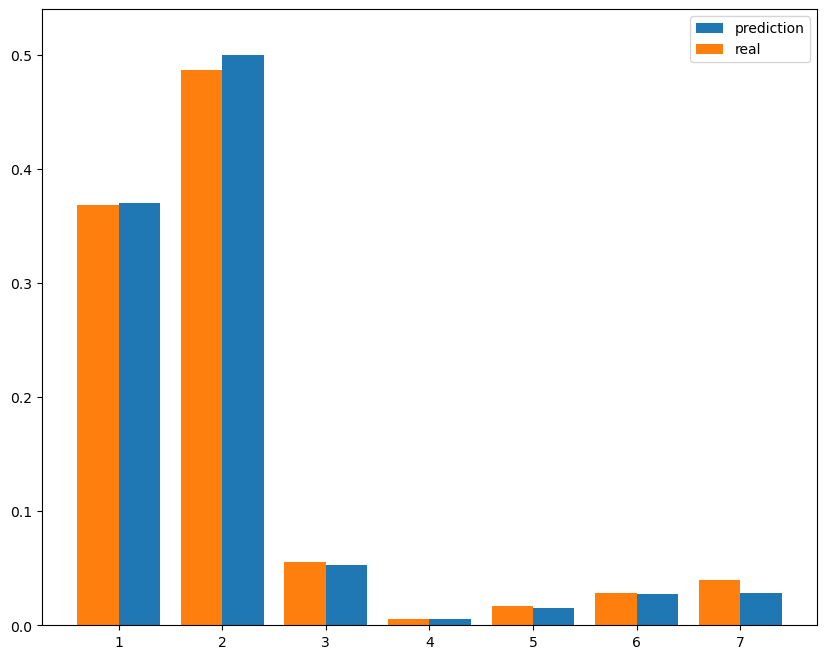

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [12]:
pred_freq

array([0.3705  , 0.500125, 0.05325 , 0.005625, 0.014875, 0.02725 ,
       0.028375])